In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
full = pd.read_csv('Zip_Zhvi_AllHomes.csv')
del full['RegionID'], full['SizeRank'], full['Metro'], full['City']

ppsqft = pd.read_csv('Zip_MedianListingPricePerSqft_AllHomes.csv')
del ppsqft['SizeRank'], ppsqft['Metro'], ppsqft['City']

In [3]:
grouped = full.groupby('CountyName').mean().transpose()
grouped = grouped.iloc[1:,:]
grouped.index = pd.to_datetime(grouped.index)

ppsqft_grouped = ppsqft.groupby('CountyName').mean().transpose()
ppsqft_grouped = ppsqft_grouped.iloc[1:,:]
ppsqft_grouped.index = pd.to_datetime(ppsqft_grouped.index)

In [4]:
bayarea_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']

# Bay Area Real Estate Boom

Over the past few years, the San Francisco Bay Area has seen a rise in home prices that some have questioned, "Is it worth living in the Bay Area?". The Bay Area has certainly seen an influx in population as a hub for technological innovation but how does it's home value compare to other parts of the nation? What kind of trend are these prices heading towards and what does that mean for prospective home seekers?

In the late 2000s, the United States nationwide saw a steep decline in real estate prices as what's known as the Great Recession and didn't recover until around 2010. The following analysis will look how the housing market has ballooned into what it is now since 2010. 

## Comparing by Bay Area County

If we first look at how houses within the Bay Area are priced (shown below), we notice some patterns emerge. Since the end of the Great Recession, each county has seen their housing prices steadily increase over time. We also notice that some counties are growing faster than others which is causing a disparity within the Bay Area. Big companies like Facebook, Google, and Twitter are all headquarted within San Mateo, Santa Clara, and San Francisco counties which are counties, along with Marin county, that seem to have grown quicker than the rest of the Bay Area. Whether these are correlated or not will need to be looked into further but there does seem to be an aggressive growth in those 4 counties which I'll call the 'upper tier'. There's been so much growth in the 'upper tier' counties that their prices are nearly double the prices of the 'lower tier' counties.

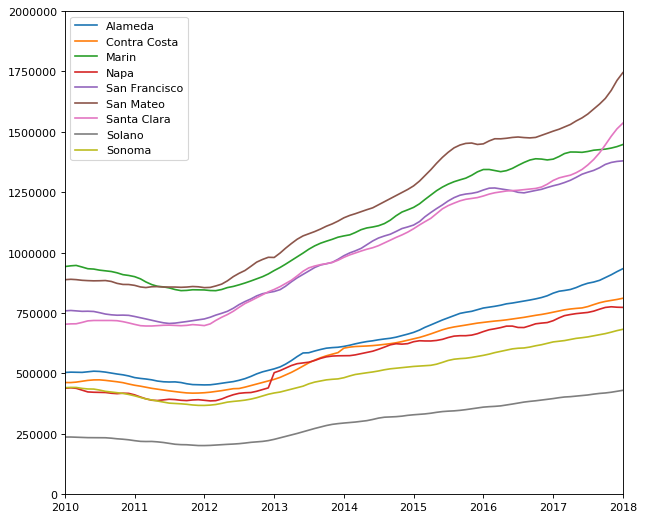

In [5]:
plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
i = 1
while i <= len(bayarea_counties):
    plt.plot(grouped[bayarea_counties[i-1]], label = bayarea_counties[i-1])
    i += 1
plt.legend()
plt.axis(['2010','2018',0,2000000])
plt.show()

Something to keep in mind is how much is a house per square foot; how do the price per square foot compare from county to county? Each Bay Area county is plotted by price per square foot by month since 2010 below and a couple things stand out. First, the same 'upper tier' counties are again the most expensive by square footage within the Bay Area. However, the price per square footage in San Francisco county is more than twice as expensive as Alameda county which is a 10 minute drive across the Bay Bridge.

Note: Data from some areas may be missing due to the fact that the data wasn't being recorded generally prior to 2012.

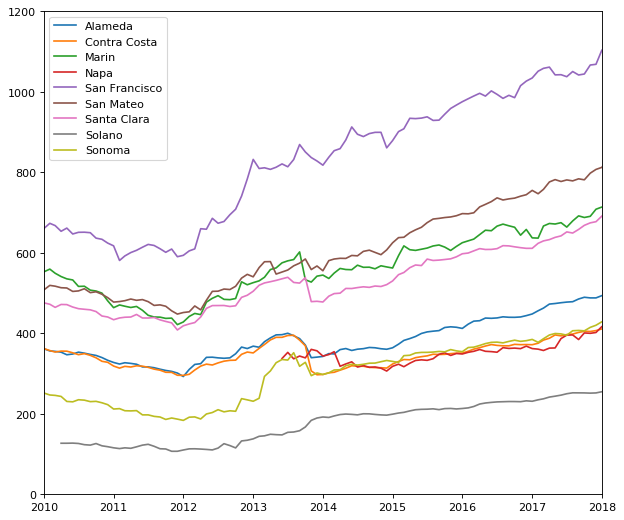

In [6]:
plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
i = 1
while i <= len(bayarea_counties):
    plt.plot(ppsqft_grouped[bayarea_counties[i-1]], label = bayarea_counties[i-1])
    i += 1
plt.legend()
plt.axis(['2010','2018',0,1200])
plt.show()

## Comparing to Rest of U.S.

Now the question remains, how bad are house prices in the Bay Area compared to the rest of the United States? Comparing Bay Area housing prices in 2010 to other counties around the U.S., including New York, Chicago, and Hawaii, we see that most Bay Area counties (dotted in red) were already above average with the 'upper tier' counties in the top 10 in home value. Fast forward to 2018, Bay Area counties have grown more aggressively with the 'upper tier' counties now all within the top 5 in the nation.

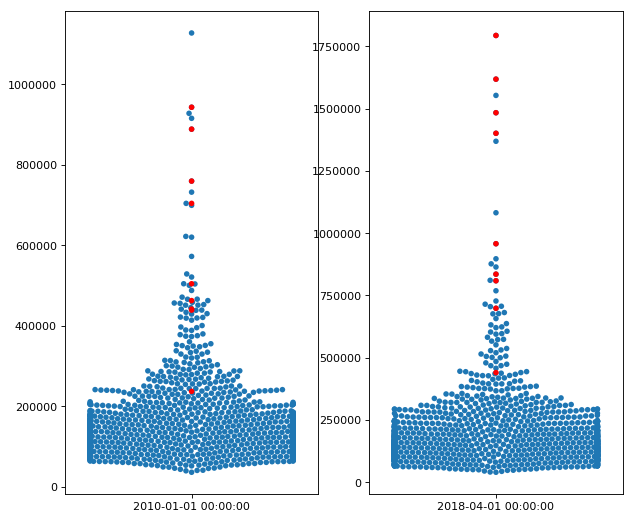

In [33]:
plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.swarmplot(data = grouped.loc['2010-01',:].transpose())
sns.stripplot(data = grouped[bayarea_counties].loc['2010-01',:].transpose(), color = 'red')
plt.subplot(1, 2, 2)
sns.swarmplot(data = grouped.loc['2018-04',:].transpose())
sns.stripplot(data = grouped[bayarea_counties].loc['2018-04',:].transpose(), color = 'red')

# add labels, change scale to match, label red dots

GRAPH PERCENT CHANGE IN PRICES SINCE 2010

* Who is your audience?
* What questions are you answering?
* Why should the audience care?
* What are you major insights and surprises?
* What change do you want to affect?

1. Ask the following questions and look for the answers using code and plots:
    * Can you count something interesting?
    * Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
    * Can you make a bar plot or a histogram?
    * Can you compare two related quantities?
    * Can you make a scatterplot?
    * Can you make a time-series plot?
2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you'd like to investigate further? What other questions do the insights lead you to ask?
3. Now that you've asked questions, hopefully you've found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

* Of course, it depends if you can afford the luxury of living and personal preferences on how and where you live.
* what percentile of prices do bay area counties fall under?

REMINDER: ADD LABELS